Use mean field analysis(**MF**) and ER network simulation (**SIS**)to solve the tasks below
- relationship between $\bar{\rho}$ and **$\lambda_+$($\lambda_\Delta+$)**
- difference between **simplex-1** and **simplex-2**
- how parameter **q** work on $\bar{\rho}$

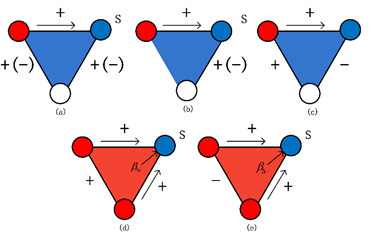

In [31]:
axisfont={'family':'Times New Roman',
     'style':'normal',
    'weight':'bold',
      'color':'black',
      'size':14}#轴标题

noticefont={'family':'Times New Roman',
     'style':'normal',
    'weight':'normal',
      'color':'black',
      'size':15}#注释

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
dir1="simdata//"
dir2="simpng//"
%matplotlib inline

In [32]:
from get_parameter import get_sim1_p
from get_parameter import get_sim2_n
from newsim import SIS_sim
from ERSignedNetwork import ERSignedNetwork

from me_analysis import me_analysis_1
from me_analysis import me_analysis_2


**1. construct the mean field analysis of spreading on signed network**

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 22 16:51:19 2020

@author: huangguo
"""
import numpy as np
class me_analysis_1(object):
    def __init__(self,p1,p3,N,p,q,mu):
        self.p1=p1
        self.p2=(p1+p3)/2
        self.p3=p3
        self.N=N
        self.p=p
        self.q=q
        self.mu=mu
        self.beta=((p**2+(1-p)**2*q**2)*p1+(2*(1-p)*(1-q)-(1-p)**2*(1-q)**2)*self.p2+2*p*(1-p)*q*p3)*(N-2)
        self.lambda0=self.beta*(N-1)*p/mu
        self.testz=1-1/self.lambda0 if 1-1/self.lambda0>0 else 0
    
class me_analysis_2(object):
    def __init__(self,m1,n1,n3,rho0):
        self.N,N=m1.N,m1.N
        self.p,p=m1.p,m1.p
        self.q,q=m1.q,m1.q
        self.mu,mu=m1.mu,m1.mu
        self.n1=n1
        self.n2=(n1+n3)/2
        self.n3=n3
        self.lambda_delta=(n1*p+self.n2*(1-p)*(1-q)+n3*(1-p)*q)*((N-1)*p*((N-1)*p-1)/2)/mu
        A1=self.lambda_delta
        B1=m1.lambda0-self.lambda_delta
        C1=1-m1.lambda0
        delta=B1**2-4*A1*C1
        if delta>0:
            self.rho1=(-B1+np.sqrt(delta))/(2*A1)
            self.rho2=(-B1-np.sqrt(delta))/(2*A1)
            if self.rho2>0:
                if rho0>self.rho2:
                    self.testz1=self.rho1
                else:
                    self.testz1=0
            elif self.rho1>0:
                self.testz1=self.rho1
            else:
                self.testz1=0
        else:
            self.rho1=""
            self.rho2=""
            self.testz1=0            

**2. use the linear programing to control parameter p1,p2,p3,n1,n2 to attain $\lambda_+$  and $\lambda_\Delta$ we expected.**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


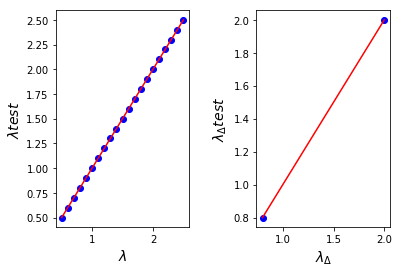

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 28 09:54:34 2020

@author: huangguo
"""
#use linear programing to solve p1,p2,n1,n2
import pulp
import numpy as np
import matplotlib.pyplot as plt
#from me_analysis import me_analysis_1
#from me_analysis import me_analysis_2
def get_sim1_p(lambda1,N,p,q,mu):
    A1=p**2+(1-p)**2*q**2
    A2=2*(1-p)*(1-q)-(1-p)**2*(1-q)**2
    A3=2*p*(1-p)*q
    prob = pulp.LpProblem(sense=pulp.LpMinimize)
    p1 = pulp.LpVariable('p1', lowBound=0,upBound=1)
    p2 = pulp.LpVariable('p2', lowBound=0,upBound=1)
    prob += p1-2*p2
    prob+=(p1-2*p2>=0)
    prob+=((A1+A2/2)*p1+(A2/2+A3)*p2==lambda1*mu/((N-2)*(N-1)*p))
    prob.solve()
    return pulp.value(p1),pulp.value(p2)


def get_sim2_n(lambda2,N,p,q,mu):
    A1=p
    A2=(1-p)*(1-q)
    A3=(1-p)*q
    prob = pulp.LpProblem(sense=pulp.LpMinimize)
    n1 = pulp.LpVariable('n1', lowBound=0,upBound=1)
    n2 = pulp.LpVariable('n2', lowBound=0,upBound=1)
    prob += n1-2*n2
    prob+=(n1-2*n2>=0)
    prob+=((A1+A2/2)*n1+(A2/2+A3)*n2==lambda2*mu/(((N-1)*p-1)*(N-1)*p/2))
    prob.solve()
    return pulp.value(n1),pulp.value(n2)
    

lambda1=0.5
lambda2=2.5
N=800
p=0.005
q=0.003
mu=0.3
rho0=0.5
#n1,n2=get_sim2_n(lambda2,N,p,q,mu)
#m1=me_analysis_1(p1,p2,N,p,q,mu)
#m2=me_analysis_2(m1,n1,n2,rho0)
#lambda=0.5:2.5:0.1
#lambda_delta=0.8,2.5
lam_array=np.arange(lambda1,lambda2+0.1,0.1)
p1_array=np.zeros(len(lam_array),dtype=float)
p3_array=np.zeros(len(lam_array),dtype=float)
lam_delta_array=np.array([0.8,2])
n1_array=np.zeros(len(lam_delta_array),dtype=float)
n3_array=np.zeros(len(lam_delta_array),dtype=float)
i=0
for lambda0 in lam_array:
    p1_array[i],p3_array[i]=get_sim1_p(lambda0,N,p,q,mu)
    i+=1
i=0
for lambda_delta in lam_delta_array:
    n1_array[i],n3_array[i]=get_sim2_n(lambda_delta,N,p,q,mu)
    i+=1

#test
lam_test_array=np.zeros(len(lam_array),dtype=float)
lam_delta_test_array=np.zeros(len(lam_delta_array),dtype=float)
i=0
for (p1,p3) in zip(p1_array,p3_array):
    m1=me_analysis_1(p1,p3,N,p,q,mu)
    lam_test_array[i]=m1.lambda0
    i+=1
i=0
for (n1,n3) in zip(n1_array,n3_array):
    m1=me_analysis_1(p1,p3,N,p,q,mu)
    lam_delta_test_array[i]=me_analysis_2(m1,n1,n3,rho0).lambda_delta
    i+=1
%matplotlib inline
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.plot(lam_array,lam_test_array,'o',color='blue')
ax1.plot(lam_array,lam_array,'-',color='red')
ax1.set_xlabel("$\\lambda$",axisfont)
ax1.set_ylabel("$\\lambda test$",axisfont)
ax2=fig.add_subplot(122)
ax2.plot(lam_delta_array,lam_delta_test_array,'o',color='blue')
ax2.plot(lam_delta_array,lam_delta_array,'-',color='red')
ax2.set_xlabel("$\\lambda_\\Delta$",axisfont)
ax2.set_ylabel("$\\lambda_\\Delta test$",axisfont)
fig.subplots_adjust(wspace =0.5, hspace =0)
fig.show()

    

**3. find the influence of diferent $\lambda_\Delta$ with same $\lambda$**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py

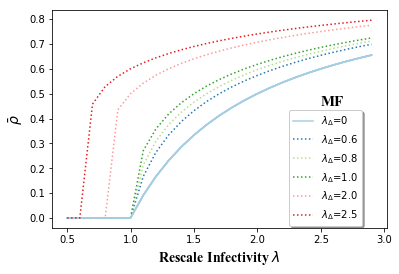

In [9]:
N=500
p=0.012
q=0.004
mu=0.3
rho0=0.5
lambda1_array=np.arange(0.5,3,0.1)
lambda_delta_array=[0.6,0.8,1,2,2.5]
%matplotlib inline
fig=plt.figure()
k=0
cmap=sns.color_palette('Paired',len(lambda_delta_array)+1)
for lambda_delta in lambda_delta_array:
    z1_array=np.zeros(len(lambda1_array),dtype=float)
    z2_array=np.zeros(len(lambda1_array),dtype=float)
    i=0
    for lambda0 in lambda1_array:
        n1,n3=get_sim2_n(lambda_delta,N,p,q,mu)
        p1,p3=get_sim1_p(lambda0,N,p,q,mu)
        m1=me_analysis_1(p1,p3,N,p,q,mu)
        z1_array[i]=m1.testz
        z2_array[i]=me_analysis_2(m1,n1,n3,rho0).testz1
        i+=1
    ax1=fig.add_subplot(111)
    ax1.plot(lambda1_array,z1_array,linestyle="-",color=cmap[0],label="$\\lambda_\\Delta$"+"=0" if k==0 else "")
    ax1.plot(lambda1_array,z2_array,linestyle=":",color=cmap[k+1],label="$\\lambda_\\Delta$"+"={:.1f}".format(lambda_delta))
    k+=1
ax1.set_xlabel("Rescale Infectivity "+"$\\lambda$",axisfont)
ax1.set_ylabel("$\\bar{\\rho}$",axisfont)
ax1.text(2.5,0.45,'MF',noticefont)
fig.legend(loc='lower right', bbox_to_anchor=(0.85,0.15),fancybox=True,shadow=True)
fig.show()
fig.savefig(dir2+"mfanalysis.png")

**4. Perform experiments on ER network with 1-simplex model**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


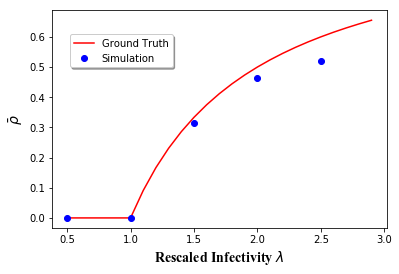

In [10]:
sim1_dict=np.load(dir1+"sim1_dict.npy").item()
testz_array=sim1_dict["me_rho"]
simz_array=sim1_dict["sim_rho"]
lambda1_array=sim1_dict["lambda_me"]
lambda2_array=sim1_dict["lambda_sim"]
fig,ax=plt.subplots()
ax.plot(lambda1_array,testz_array,'-',color="red",label="Ground Truth")
ax.plot(lambda2_array,simz_array,'o',color="blue",label="Simulation")
ax.set_xlabel("Rescaled Infectivity "+"$\\lambda$",axisfont)
ax.set_ylabel("$\\bar{\\rho}$",axisfont)
fig.legend(loc='upper left', bbox_to_anchor=(0.15,0.85),fancybox=True,shadow=True)
fig.show()
fig.savefig(dir2+"1_simplex.png")

**5 Perform experiments on ER network with 2-simplex model**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


'\nfor i in [1,4,2,3]:\n    sim_dict=np.load("C:\\Users\\huangguo\\Desktop\\符号网络的高阶传播模型\\project1\\simplified model on signed network\\sim{}_dict.npy".format(int(i))).item()\n    ax1.plot(sim_dict["lambda_me"],sim_dict["me_rho"],\'-\',color=\'black\')\n    ax1.plot(sim_dict["lambda_sim"],sim_dict["sim_rho"],marks[i-1],color=\'black\',markersize=markersizes[i-1],mfc=mfcs[i-1],label=label1[i-1])\nlgd = ax1.legend(fontsize=13, handlelength=1, handletextpad=0.3, borderaxespad=0.2,\n                loc=\'lower right\', labelspacing=0.2, borderpad=0.4) \nax1.add_artist(lgd) \nh=plt.plot([],[],\'-\',color="black",markersize=4,label="MF")\nlgd = plt.legend(handles=h, loc=(0.1,0.83), frameon=False, fontsize=14, handlelength=1, borderpad=0.1)\nax1.add_artist(lgd)\nax1.text(1.9,0.23,"SIS",noticefont)\nax1.set_xlabel("Rescaled Infectivity $\\lambda$",axisfont)\nax1.set_ylabel("$\\bar{\\rho}$",axisfont)\nfig.show()\n'

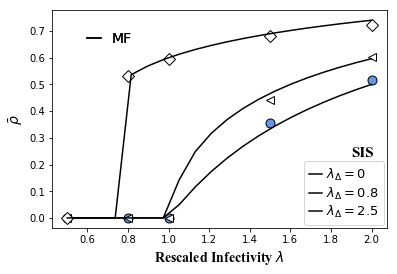

In [11]:
mfcs = ['cornflowerblue','white', 'white']
label1=["$\\lambda_\\Delta=0$","$\\lambda_\\Delta=0.8$","$\\lambda_\\Delta=2.5$"]
marks=["o","<",'D']
markersizes=[9,8,8]
lambda2_array=np.load(dir1+"simresult.npz")["lambda2_array"]
simlambda2list=np.load(dir1+"simresult.npz")["simlambda2list"]
mflambda2list=np.load(dir1+"simresult.npz")["mflambda2list"]
lambda1_array=np.load(dir1+"simresult.npz")["lambda1_array"]
lambda1_array_0=np.load(dir1+"simresult.npz")["lambda1_array_0"]
i=0
fig=plt.figure()
ax1=fig.add_subplot(111)
for simlambda1list,mflambda1list,lambda2 in zip(simlambda2list,mflambda2list,lambda2_array):
    
    ax1.plot(lambda1_array,simlambda1list,marks[i],color='black',mfc=mfcs[i],markersize=markersizes[i])        
    ax1.plot(lambda1_array_0,mflambda1list,'-',label=label1[i],color='black')
    i+=1
lgd = ax1.legend(fontsize=13, handlelength=1, handletextpad=0.3, borderaxespad=0.2,
                loc='lower right', labelspacing=0.2, borderpad=0.4) 
ax1.add_artist(lgd) 
h=plt.plot([],[],'-',color="black",markersize=4,label="MF")
lgd = plt.legend(handles=h, loc=(0.1,0.83), frameon=False, fontsize=14, handlelength=1, borderpad=0.1)
ax1.add_artist(lgd)
ax1.text(1.9,0.23,"SIS",noticefont)
ax1.set_xlabel("Rescaled Infectivity $\\lambda$",axisfont)
ax1.set_ylabel("$\\bar{\\rho}$",axisfont)
fig.show()
fig.savefig(dir2+"sim_mf.png")
'''
for i in [1,4,2,3]:
    sim_dict=np.load("C:\\Users\\huangguo\\Desktop\\符号网络的高阶传播模型\\project1\\simplified model on signed network\\sim{}_dict.npy".format(int(i))).item()
    ax1.plot(sim_dict["lambda_me"],sim_dict["me_rho"],'-',color='black')
    ax1.plot(sim_dict["lambda_sim"],sim_dict["sim_rho"],marks[i-1],color='black',markersize=markersizes[i-1],mfc=mfcs[i-1],label=label1[i-1])
lgd = ax1.legend(fontsize=13, handlelength=1, handletextpad=0.3, borderaxespad=0.2,
                loc='lower right', labelspacing=0.2, borderpad=0.4) 
ax1.add_artist(lgd) 
h=plt.plot([],[],'-',color="black",markersize=4,label="MF")
lgd = plt.legend(handles=h, loc=(0.1,0.83), frameon=False, fontsize=14, handlelength=1, borderpad=0.1)
ax1.add_artist(lgd)
ax1.text(1.9,0.23,"SIS",noticefont)
ax1.set_xlabel("Rescaled Infectivity $\\lambda$",axisfont)
ax1.set_ylabel("$\\bar{\\rho}$",axisfont)
fig.show()
'''

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


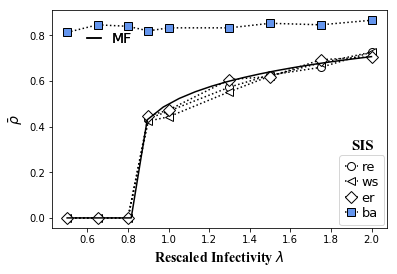

In [12]:
mfcs = ['white','white', 'white','cornflowerblue']
label1=["re","ws","er",'ba']
marks=["o","<",'D','s']
markersizes=[8,8,8,8]
#lambda2_array=np.load("simnetworktest.npz")["lambda2_array"]
simnetworklist=np.load(dir1+"test_net2.npz")["simnetworklist"]
mfnetworklist=np.load(dir1+"test_net2.npz")["mfnetworklist"]
lambda1_array=np.load(dir1+"test_net2.npz")["lambda1_array"]
lambda1_array_0=np.load(dir1+"test_net2.npz")["lambda1_array_0"]
i=0
fig=plt.figure()
ax1=fig.add_subplot(111)
for simlambda1list,networktype in zip(simnetworklist,label1):
            
    ax1.plot(lambda1_array,simlambda1list,marks[i],linestyle=":",color="black",mfc=mfcs[i],markersize=8,label=networktype)
            #ax.plot(lambda1_array_0,mflambda1list,'-',label="$\\lambda_{\\Delta}=$"+str(lambda2),color=colors[i])
    i+=1
ax1.plot(lambda1_array_0,mfnetworklist[0],color="black")
lgd = ax1.legend(fontsize=13, handlelength=1, handletextpad=0.3, borderaxespad=0.2,
                loc='lower right', labelspacing=0.2, borderpad=0.4) 
ax1.add_artist(lgd) 
h=plt.plot([],[],'-',color="black",markersize=4,label="MF")
lgd = plt.legend(handles=h, loc=(0.1,0.83), frameon=False, fontsize=14, handlelength=1, borderpad=0.1)
ax1.add_artist(lgd)
ax1.text(1.9,0.3,"SIS",noticefont)
ax1.set_xlabel("Rescaled Infectivity $\\lambda$",axisfont)
ax1.set_ylabel("$\\bar{\\rho}$",axisfont)
fig.show()
fig.savefig(dir2+"network_sim.png")

$$-1: \Delta<0  \forall q , \lambda_+>1$$
$$0: \Delta>0,q2>1  \forall q , \lambda_+<1$$
$$1:\Delta>0,0<q2<1  \exists q2  if  q<q2, \lambda_+>   else  \lambda_+=1$$

In [16]:
from sympy import *
def cal_me2():
    p, q, p1,a=symbols('p q p1 a')
    p3=p1/a
    p2=(p1+p3)/2
    A=p**2*p1 - p**2*p2 - 2*p*p1 + 2*p*p2 + p1 - p2
    B=2*p**2*p2 - 2*p**2*p3 - 2*p*p2 + 2*p*p3
    expr=collect(collect(B+2*A,p1),p1)
    expr1=collect(2*p*(p1/2 + p1/(2*a)),p1)
    expr2=collect(2*p**2 - 4*p + 1 - 2*p**2/a + 2*p/a - 1/a,p)
    expr3=collect(p**2*(2 - 2/a) + p*(-4 + 2/a) + 1 - 1/a+2*p*(1/2 + 1/(2*a)),p)*p1
    print(expr3)
cal_me2()

p1*(p**2*(2 - 2/a) + p*(-3.0 + 3/a) + 1 - 1/a)


$$(1-1/a)(2p-1)(p-1)>0$$

if p<0.5 then $\exists q0$ q<q0,$\lambda$ decrease ; q>q0, $\lambda$ increase

if p>0.5 $\forall q$ $\lambda$ incease

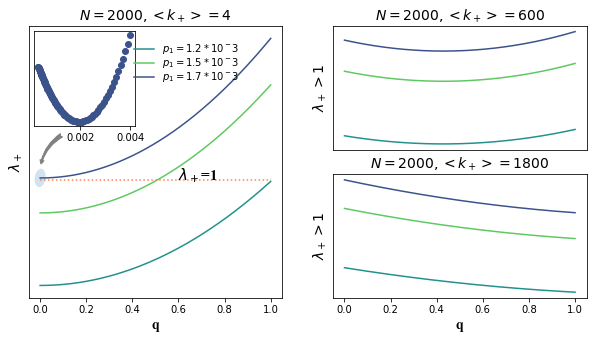

In [13]:
axisfont={'family':'Times New Roman',
     'style':'normal',
    'weight':'bold',
      'color':'black',
      'size':14}#轴标题

noticefont={'family':'Times New Roman',
     'style':'normal',
    'weight':'normal',
      'color':'black',
      'size':15}#注释
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
cmap=sns.color_palette('viridis',3)
test_q=np.load(dir1+"qtest_plot.npy").item()
pic=test_q["p1"]
q1_array=pic["q1_array"]
lam0_array=pic["lam0_array"]
lam_array1=pic["lam_array1"]
lam_array2=pic["lam_array2"]
q_array=pic["q_array"]
lam_list=pic["lam_list"]
fig=plt.figure(figsize=[10,5])
ax1=fig.add_subplot(121)
label1=["$p_1=1.5*10^-3$","$p_1=1.7*10^-3$","$p_1=1.2*10^-3$"]
ax1.plot(q1_array,lam_array2,'-',color=cmap[1],label=label1[2])
ax1.plot(q1_array,lam0_array,'-',color=cmap[2],label=label1[0])
ax1.plot(q1_array,lam_array1,'-',color=cmap[0],label=label1[1])
ax1.plot(q1_array,np.ones(1000,dtype=float),':',color="coral")
ax1.set_xlabel("q",axisfont)
ax1.set_ylabel("$\\lambda_+$",axisfont)
ax1.set_yticks([])
ax1.text(0.6,1,"$\lambda_+$=1",noticefont)
el = mpatches.Ellipse((q1_array[0],lam_array1[0]), 1/20, 1/24, angle=30, alpha=0.2)
ax1.add_artist(el)
ax1.annotate("",
            xy=(q1_array[0], lam_array1[0]), xycoords='data',
            xytext=(0.1, 1.11), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
                            )
ax1.set_title("$N=2000,<k_+>=4$",axisfont)
axins = inset_axes(ax1, width="40%", height="35%",
                   loc=2)
axins.plot(q_array,lam_list[2],'o',color=cmap[0])
axins.set_yticks([])



pic=test_q["p2"]
q1_array=pic["q1_array"]
lam0_array=pic["lam0_array"]
lam_array1=pic["lam_array1"]
lam_array2=pic["lam_array2"]
ax2=fig.add_subplot(222)
label1=["$p_1=1.5*10^-3$","$p_1=1.7*10^-3$","$p_1=1.2*10^-3$"]
ax2.plot(q1_array,lam_array2,'-',color=cmap[1])
ax2.plot(q1_array,lam0_array,'-',color=cmap[2])
ax2.plot(q1_array,lam_array1,'-',color=cmap[0])
ax2.set_xlabel("")
ax2.set_ylabel("$\\lambda_+>1$",axisfont)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("$N=2000,<k_+>=600$",axisfont)

ax3=fig.add_subplot(224)
pic=test_q["p3"]
q1_array=pic["q1_array"]
lam0_array=pic["lam0_array"]
lam_array1=pic["lam_array1"]
lam_array2=pic["lam_array2"]
label1=["$p_1=1.5*10^-3$","$p_1=1.7*10^-3$","$p_1=1.2*10^-3$"]
ax3.plot(q1_array,lam_array2,'-',color=cmap[1])
ax3.plot(q1_array,lam0_array,'-',color=cmap[2])
ax3.plot(q1_array,lam_array1,'-',color=cmap[0])
ax3.set_xlabel("q",axisfont)
ax3.set_ylabel("$\\lambda_+>1$",axisfont)
ax3.set_yticks([])
ax3.set_title("$N=2000,<k_+>=1800$",axisfont)

fig.legend(bbox_to_anchor=(0.26,0.85),frameon=False,markerscale=0.5,labelspacing=0,loc="upper center")
fig.savefig(dir2+"testq.png")

在稀疏网络中，负边比例的增长会使得网络的传播速度在很小的范围内先减然后继续增长，这是因为负边在稀疏网络中一定程度的增长会促使triangle2减少，增加triangle1，从而加剧网络中的传播过程；
在p值小于0.5的网络中，存在临界值q0使得传播速度先减后增，同时网络正向连接密度的增加会使得临界值q0增加。当p值超过0.5时，传播速度在q的范围内都是递减的,这是因为负边的增加会破坏triangle1和triangle2,从而使得平衡结构遭到破坏。因此我们可以将负边的贡献总结为在稀疏网络中更有利于形成平衡结构triangle1，而在稠密的网络中更容易破坏平衡结构，形成triangle3。这给我们带来了启示，在一个非合作或者合作关系不多的网络中，我们是否可以通过增加一定的敌对关系来促进传播过程。

$$\lambda_+ \propto q^2$$
$$\lambda_\Delta+ \propto q$$

D:\OneDrive - mail.bnu.edu.cn\科研\git科研\simplified-contagion-on-signed-network\me_analysis.py:36: RuntimeWarning: invalid value encountered in double_scalars
  self.rho1=(-B1+np.sqrt(delta))/(2*A1)
D:\OneDrive - mail.bnu.edu.cn\科研\git科研\simplified-contagion-on-signed-network\me_analysis.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  self.rho2=(-B1-np.sqrt(delta))/(2*A1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.9976107178599632


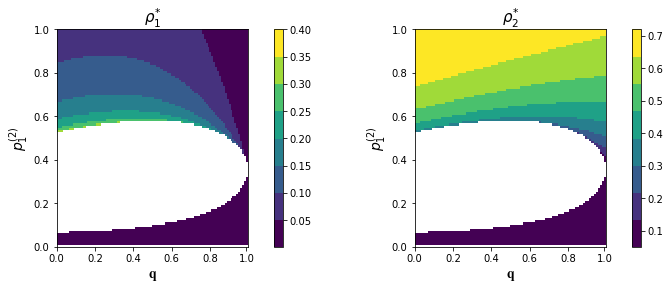

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from me_analysis import me_analysis_1
from me_analysis import me_analysis_2
p1=np.logspace(-5,-2.5,1000)[443]
p3=p1/2
p=np.logspace(-3.3,-2.7,1000)[982]
N=2000
mu=1
#np.log10(n1_a[918])
n1_a=np.linspace(0,1,100)
q_a=np.linspace(0,1,100)
rho1_a=np.zeros((n1_a.shape[0],q_a.shape[0]),dtype="float")
rho2_a=np.zeros((n1_a.shape[0],q_a.shape[0]),dtype="float")
i=0
rho0=0
for n1 in n1_a:
    j=0
    n3=n1/2
    for q in q_a:
        m1=me_analysis_1(p1,p3,N,p,q,mu)
        rho1_a[i,j]=me_analysis_2(m1,n1,n3,rho0).rho1
        rho2_a[i,j]=me_analysis_2(m1,n1,n3,rho0).rho2#the lower rho
        j+=1
    i+=1
tab=np.copy(rho2_a)
tab=pd.DataFrame(tab)
y_index=["%.1f" % i for i in n1_a]
x_index=["%.1f" % i for i in q_a]
tab.index=y_index
tab.columns=x_index

tab1=np.copy(rho1_a)
tab1=pd.DataFrame(tab1)
y_index=["%.1f" % i for i in n1_a]
x_index=["%.1f" % i for i in q_a]
tab1.index=y_index
tab1.columns=x_index



np.max(tab[~np.isnan(tab)])#0.328
np.min(tab[~np.isnan(tab)])#0.001

np.max(rho1_a[~np.isnan(rho1_a)])#0.328
np.min(rho1_a[~np.isnan(rho1_a)])#0.001

viridis = cm.get_cmap('viridis', 8)
newcolors = viridis(np.linspace(0, 1, 8))
newcmp = ListedColormap(newcolors)

fig,ax=plt.subplots(1,2,figsize=(2* 4 + 3,4),constrained_layout=True, squeeze=False)
fig.subplots_adjust(wspace =0.4, hspace =0)
ax1,ax2=ax.flat[0],ax.flat[1]
psm = ax1.pcolormesh(tab, cmap=newcmp, rasterized=True, vmin=0.001, vmax=0.4)
ax1.set_xticks(list(range(0,100,20))+[99])
ax1.set_xticklabels([x_index[i] for i in list(range(0,100,20))+[99]])
ax1.set_yticklabels([y_index[i] for i in list(range(0,100,20))+[99]])
ax1.set_xlabel("q",axisfont)
ax1.set_ylabel("$p_{1}^{(2)}$",axisfont)
fig.colorbar(psm, ax=ax1,aspect=25,pad=0.1)

viridis = cm.get_cmap('viridis', 8)
newcolors = viridis(np.linspace(0, 1, 8))
newcmp = ListedColormap(newcolors)

psm = ax2.pcolormesh(tab1, cmap=newcmp, rasterized=True, vmin=0.05, vmax=0.72)
ax2.set_xticks(list(range(0,100,20))+[99])
ax2.set_xticklabels([x_index[i] for i in list(range(0,100,20))+[99]])
ax2.set_yticklabels([y_index[i] for i in list(range(0,100,20))+[99]])
ax2.set_xlabel("q",axisfont)
ax2.set_ylabel("$p_{1}^{(2)}$",axisfont)
fig.colorbar(psm, ax=ax2,aspect=25,pad=0.1)
ax1.set_title("$\\rho _{1}^{*}$",noticefont)
ax2.set_title("$\\rho _{2}^{*}$",noticefont)
fig.savefig(dir2+"双稳态.png",dpi=1000)
fig.show()
print(me_analysis_1(p1,p3,N,p,q,mu).lambda0)

In [1]:

import numpy as np
from matplotlib import pyplot as plt

import operator as op
from functools import reduce

def factorial(n):
    return reduce(op.mul, range(1, n + 1), 1)

def const(n, a, b, c):
    """
        return n! / a! b! c!, where a+b+c == n
    """
    assert  a + b + c == n

    numer = factorial(n)
    denom = factorial(a) * factorial(b) * factorial(c)
    return numer / denom

def multinomial(n):
    """
    :param x : list, sum(x) should be `n`
    :param n : number of trial
    :param p: list, sum(p) should be `1`
    """
    # get all a,b,c where a+b+c == n, a<b<c
    ls = []
    for i in range(1, n + 1):
        for j in range(i, n + 1):
            for k in range(j, n + 1):
                if i + j + k == n:
                    ls.append([i, j, k])

    y = [const(n, l[0], l[1], l[2])* for l in ls]
    x = np.arange(len(y))
    return x, y, np.mean(y), np.std(y)


    

In [3]:
x, y, u, s = multinomial(98)
print(x)
print(y)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

D:\Anaconda\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


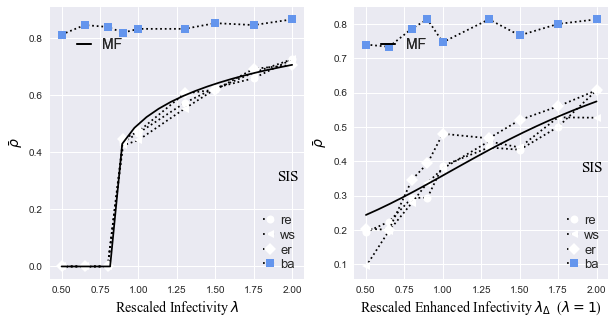

In [26]:
mfcs = ['white','white', 'white','cornflowerblue']
label1=["re","ws","er",'ba']
marks=["o","<",'D','s']
markersizes=[8,8,8,8]
#lambda2_array=np.load("simnetworktest.npz")["lambda2_array"]
simnetworklist=np.load(dir1+"test_net2.npz")["simnetworklist"]
mfnetworklist=np.load(dir1+"test_net2.npz")["mfnetworklist"]
lambda1_array=np.load(dir1+"test_net2.npz")["lambda1_array"]
lambda1_array_0=np.load(dir1+"test_net2.npz")["lambda1_array_0"]
i=0
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
for simlambda1list,networktype in zip(simnetworklist,label1):
            
    ax1.plot(lambda1_array,simlambda1list,marks[i],linestyle=":",color="black",mfc=mfcs[i],markersize=8,label=networktype)
            #ax.plot(lambda1_array_0,mflambda1list,'-',label="$\\lambda_{\\Delta}=$"+str(lambda2),color=colors[i])
    i+=1
ax1.plot(lambda1_array_0,mfnetworklist[0],color="black")
lgd = ax1.legend(fontsize=13, handlelength=1, handletextpad=0.3, borderaxespad=0.2,
                loc='lower right', labelspacing=0.2, borderpad=0.4) 
ax1.add_artist(lgd) 
h=plt.plot([],[],'-',color="black",markersize=4,label="MF")
lgd = plt.legend(handles=h, loc=(0.1,0.83), frameon=False, fontsize=14, handlelength=1, borderpad=0.1)
ax1.add_artist(lgd)
ax1.text(1.9,0.3,"SIS",noticefont)
ax1.set_xlabel("Rescaled Infectivity $\\lambda$",axisfont)
ax1.set_ylabel("$\\bar{\\rho}$",axisfont)


fname=dir1+"test_net_delta_1"
lambda2_array_0=np.load(fname+".npz")['lambda2_array_0']
mfnetworklist=np.load(fname+".npz")['mfnetworklist']
networktypelist=np.load(fname+".npz")['networktypelist']
simnetworklist=np.load(fname+".npz")['simnetworklist']
lambda2_array=np.load(fname+".npz")['lambda2_array']
mfcs = ['white','white', 'white','cornflowerblue']
label1=["re","ws","er",'ba']
marks=["o","<",'D','s']
i=0
ax2=fig.add_subplot(122)
for simlambda1list,networktype in zip(simnetworklist,label1):
            
    ax2.plot(lambda2_array,simlambda1list,marks[i],linestyle=":",color="black",mfc=mfcs[i],markersize=8,label=networktype)
            #ax.plot(lambda1_array_0,mflambda1list,'-',label="$\\lambda_{\\Delta}=$"+str(lambda2),color=colors[i])
    i+=1
ax2.plot(lambda2_array_0,mfnetworklist[0],color="black")
lgd = plt.legend(fontsize=13, handlelength=1, handletextpad=0.3, borderaxespad=0.2,
                        loc='lower right', labelspacing=0.2, borderpad=0.4) 
ax2.add_artist(lgd) 
h=plt.plot([],[],'-',color="black",markersize=4,label="MF")
lgd = plt.legend(handles=h, loc=(0.1,0.83), frameon=False, fontsize=14, handlelength=1, borderpad=0.1)
ax2.add_artist(lgd)
ax2.text(1.9,0.37,"SIS",noticefont)
ax2.set_xlabel("Rescaled Enhanced Infectivity $\\lambda_{\\Delta}$  ($\\lambda=1$)",axisfont)
ax2.set_ylabel("$\\bar{\\rho}$",axisfont)
fig.show()
fig.savefig(dir2+"不同网络结构下的传播率.png",dpi=500)

D:\Anaconda\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


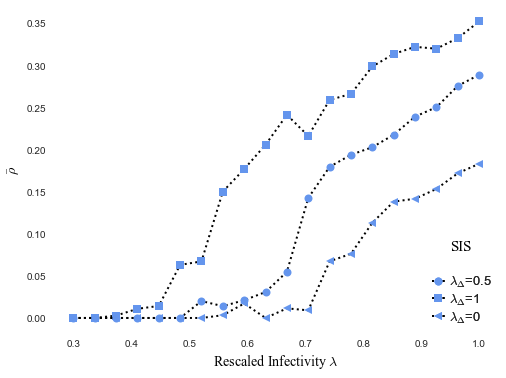

In [45]:
#BA_test
'''
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(111)
markers=["o","s","<","D"]
y1=np.zeros(20)
for i in [1,3,4]:
    simnetworkdict=np.load("ba_test_"+str(i)+".npz",allow_pickle=True)["recording"].item()
    x=simnetworkdict["lambda1"]
    y=simnetworkdict['simz']
    y1+=np.array(y)
    rho0=simnetworkdict['rho0']
    ax1.plot(x,y,marker=markers[i-1],linestyle=":",color="black",mfc='cornflowerblue',markersize=8)
ax1.plot(x,y1/3,linestyle="-",color="black",label="$\\lambda_{\\Delta}$"+"=0.5")
ax1.set_xlabel("Rescaled Infectivity $\\lambda$ ",axisfont)
ax1.set_ylabel("$\\bar{\\rho}$",axisfont)
fig.legend(bbox_to_anchor=(0.26,0.85),frameon=False,markerscale=0.5,labelspacing=0,loc="upper center")
fig.show()
fig.savefig("BA网络实验.png",dpi=500)

'''
#fig=plt.figure(figsize=(10,5),facecolor="white",edgecolor="black")
fig,ax1 = plt.subplots()

#ax1.set_edgecolor('black')
k=0
for i in [5,6,7]:
    simnetworkdict=np.load("simdata\\"+"ba_new_test_"+str(i)+".npz",allow_pickle=True)["recording"].item()
    lambda2=simnetworkdict["lambda2"]
    x=simnetworkdict["lambda1"]
    y=simnetworkdict['simz']
    ax1.plot(x,y,marker=markers[k],linestyle=":",color="black",mfc='cornflowerblue',markersize=8,label="$\\lambda_{\\Delta}$"+"="+str(lambda2))
    k+=1
ax1.set_xlabel("Rescaled Infectivity $\\lambda$ ",axisfont)
ax1.set_ylabel("$\\bar{\\rho}$",axisfont)
lgd = ax1.legend(fontsize=13, handlelength=1, handletextpad=0.3, borderaxespad=0.2,
                        loc='lower right', labelspacing=0.2, borderpad=0.4) 
ax1.text(0.95,0.08,"SIS",noticefont)
ax1.add_artist(lgd)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
#fig.legend(bbox_to_anchor=(0.26,0.85),frameon=False,markerscale=0.5,labelspacing=0,loc="upper center")
plt.style.use("bmh")
plt.grid(False)
plt.rcParams.update({"figure.figsize" : (8, 5),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
fig.show()

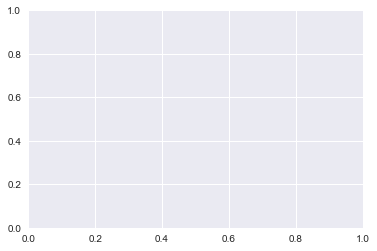

In [34]:
fig=plt.figure()
ax=fig.add_subplot(111)